## Demonstration of the Gradient descent method for a simple linear regression model to estimate the slope and intercept values

**Goal:** In this notebook you will see how the mse loss of a simple linear regression depends on the value of the slope (a) and intercept (b) parameter. You will see that the optimal parameter values can be found via gradient descent (GD) when computing the gradient of the loss w.r.t the parameters via the gradient formula and updating the parameter values via the update formula.

**Usage:** The idea of the notebook is that you try to understand the provided code by running it, checking the output and playing with it by slightly changing the code and rerunning it. Some positions are marked as exercises, where you find some more specific tasks.

**Dataset:** You work with simulated data for which we know that the true linear model has the parameters a=1 and b=1. By un-commenting one cell you can also generate the systolic blood pressure and age data of 33 American women and do the GD for this data.

**Content:**

* simulate data from the model y=1*x+1+noise

* visualize the data with linear regression fit via the sklearn machine learning library of python.

* define the loss function and plot the loss versus the tunable model parameters a and b.

* initialize the intercept b=3 and slope a=3.

* compute the gradients of the loss w.r.t. the model parameters a and b via the gradient formula and update the parameter values via the update formula

* iterate over the former step and check the current values of the estimated model parameter and the loss after each step. Visualize the development of the slope value in the loss-vs-parameters plot.

* verify that the estimated model parameter values converges to the values which you got from the sklearn fit.



 [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/nb_ch03_02.ipynb)




#### Imports

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.linear_model import LinearRegression

#### Blood Pressure data
Here is the systolic blood pressure and the age of the 33 American women. You can uncomment the cell below for the exercise at the end of this notebook.

In [2]:
###################
## Blood Pressure data
#x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9,
#     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
#y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114,
#     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
#     176,  99, 130, 172, 121, 133, 178, 147, 144, 217]
#x = np.asarray(x, np.float32)
#y = np.asarray(y, np.float32)

#### Simulate some data

Here we simulate 50 datapoints for x and y, where y=a*x+b with slope a=1 and intercept b=1

In [3]:
#################
## Simulate some data
n = 50
np.random.seed(42)
x = np.random.normal(0,1,n)
print("genarated random dataset : \n")
print(x)
y = 1*x + 1 + np.random.normal(0,1,n)

genarated random dataset : 

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016]


Let's plot the data in a scatter plot and use the skleran library to determine and print the opimal values for the slope a and the intercept b. We see that because of the random noise the optimal values are close to a=1 and b=1 but they have a bit deviation.

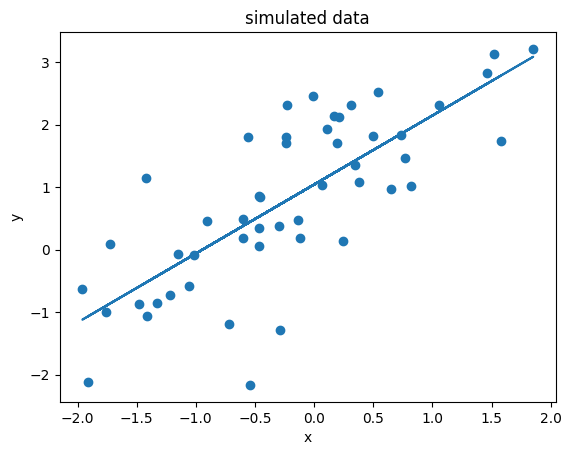

intercept =  1.0410217387867964 solpe =  1.1030756454608008


In [4]:
plt.scatter(x,y)
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")

model = LinearRegression()
model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)

plt.show()
print("intercept = ",model.intercept_,"solpe = ", model.coef_[0],)

Here we define the mean squared error (MSE) loss as a function of a and b, and calculate the minimal loss with the the optimal values form the cell above.

In [5]:
def loss(a,b):
  return 1/len(x)*(np.sum((a*x + b - y)**2))

In [6]:
loss(model.intercept_ ,model.coef_[0])

0.7491512476548897

Now, let's plot the loss landscape for our parameters a and b in a 3d plot. We see that the loss function is shaped like a bowl. The contour lines at the bottom indicate positions of equal loss values. On the right side there is a zoom for the region a=b=3, we see that if we decrease a and b from there, the loss also decreases.

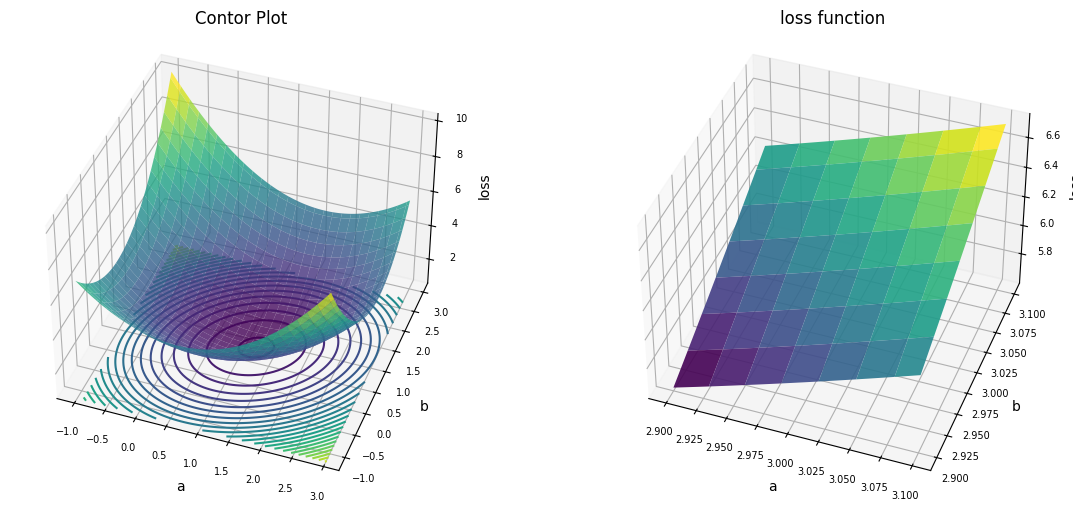

In [23]:
#Produce the plots
def loss(a,b):
  # print(a,b)
  return 1/len(x)*(np.sum((a*x + b - y)**2))  

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection="3d")
# generates & shuffles an array of values starting from -1 (inclusive), ending at 3.0 (exclusive), with a step of 0.05.
a = b = np.arange(-1, 3.0, 0.05)
A, B = np.meshgrid(a, b) # makes repetetive 2D arrays from a and b
# for a,b in zip(np.ravel(A), np.ravel(B)) makes (a, b) pairs where ravel converts 2D to 1D
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss_vals = zs.reshape(A.shape)

ax.plot_surface(A, B, loss_vals, cmap="viridis", rstride=3, cstride=3,edgecolor='none',alpha=0.8)
ax.contour(A, B, loss_vals, 30, cmap="viridis", linestyles="solid", offset=0)
ax.view_init(40, 290)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('loss',rotation="vertical")
ax.set_title('Contor Plot')
# ax.scatter3D(2.95, 2.95, 6.1589, c="r",s=90)
plt.tick_params(axis='both', which='major', labelsize=7)


ax = fig.add_subplot(1, 2, 2, projection="3d")
a = b = np.arange(2.9, 3.1, 0.01)
A, B = np.meshgrid(a, b)
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss_vals = zs.reshape(A.shape)

ax.plot_surface(A, B, loss_vals, cmap="viridis", rstride=3, cstride=3,edgecolor='none',alpha=0.9)
ax.contour(A, B, loss_vals, 20, cmap="viridis", linestyles="solid", offset=0)
ax.view_init(40, 290)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('loss',rotation="vertical")
ax.set_title('loss function')
plt.tick_params(axis='both', which='major', labelsize=7)


## The gradients

From the book we know that the gradiens are:

$$
  grad_a = \frac{\partial}{\partial a}\frac{1}{n}\sum_{i=1}^n(a x_i + b - y_i)^2 = \frac{2}{n}\sum_{i=1}^n(a x_i + b - y_i) x_i
$$


$$
  grad_b = \frac{\partial}{\partial b}\frac{1}{n}\sum_{i=1}^n(a x_i + b - y_i)^2 = \frac{2}{n}\sum_{i=1}^n(a x_i + b - y_i)  
$$

Now we want to use the gradients to find the optimal values for a and b to minimize the MSE loss.

Here we define the formula for the gradients of the loss w.r.t a and b as a function, to use them latter for the parameter update.




In [49]:
def grad(a,b):
  y_hat = a*x + b
  n2 = 2.0 / len(x)
  return n2*np.sum((y_hat - y)*x) , n2*np.sum((y_hat - y))


def loss(a,b):
  return 1/len(y)*(np.sum((a*x + b - y)**2))

We start with the initial values a=3 and b=3 and calculate the gradients of the loss w.r.t a and b, then we use the update rule to get new (better) values for a and b. Here we repeat this for 20 steps with the learning rate eta = 0.1 and we already get very close to the optimal values (see cell below).

In [50]:
eta = 0.1
a_ = 3
b_ = 3
loss_ = loss(a_,b_)
a_history = a_
b_history = b_
loss_history= loss_
for i in range(20):
    grad_a, grad_b  = grad(a_,b_)
    a_ = a_ - eta * grad_a
    b_ = b_ - eta * grad_b
    loss_= loss(a_,b_)
    a_history =np.append(a_history,a_)
    b_history =np.append(b_history,b_)
    loss_history =np.append(loss_history,loss_)
    print("a = ", a_, "b = ", b_, "gard_a = ", grad_a, "gard_b = ", grad_b, "loss = ", loss_)

a =  2.744942845648942 b =  2.6937457361960466 gard_a =  2.5505715435105794 gard_b =  3.0625426380395346 loss =  4.687918563868553
a =  2.522247766421194 b =  2.4372405786218736 gard_a =  2.2269507922774756 gard_b =  2.5650515757417303 loss =  3.618963033329927
a =  2.3282997383312454 b =  2.221994066723574 gard_a =  1.939480280899489 gard_b =  2.1524651189829958 loss =  2.8410471967168425
a =  2.1597552833117173 b =  2.0410508133429004 gard_a =  1.6854445501952804 gard_b =  1.809432533806733 loss =  2.274270722986826
a =  2.013562535536295 b =  1.8886957353418576 gard_a =  1.4619274777542233 gard_b =  1.523550780010428 loss =  1.8609398110694477
a =  1.886964382611374 b =  1.7602191429888134 gard_a =  1.2659815292492125 gard_b =  1.2847659235304432 loss =  1.5592849344943454
a =  1.7774904448806577 b =  1.6517289531187387 gard_a =  1.094739377307163 gard_b =  1.0849018987007466 loss =  1.3390002764687785
a =  1.6829420384955902 b =  1.5600000979698965 gard_a =  0.9454840638506735 gard

In the following plot we again look at the loss landscape for our parameters a and b in a 3d plot. We see the development of the parameters a and b. We started with a=3 and b=3, then we rolled down the loss landscape and after 20 update steps we are almost in the minimum.

Text(0.7949938623845728, 1.11751241458309, 'after 20 steps')

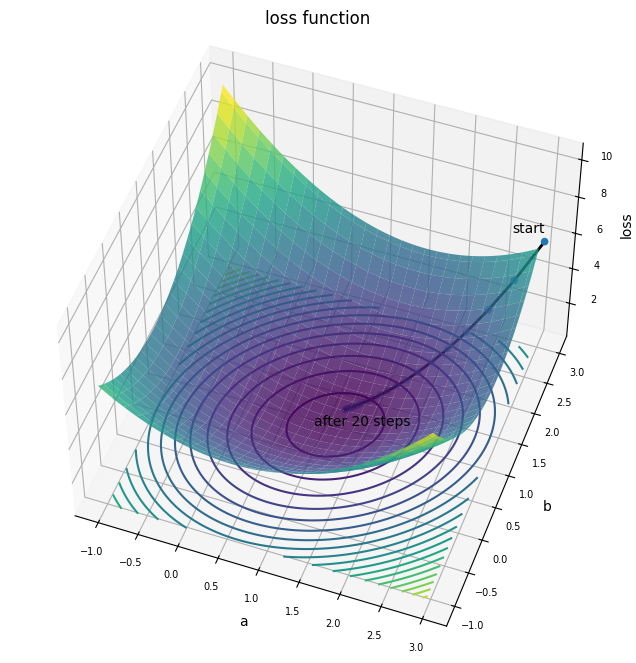

In [51]:
#Produce the plot

def loss(a,b):
  return 1/len(x)*(np.sum((a*x + b - y)**2))


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot3D(a_history, b_history, loss_history, 'black',lw=2)
a = b = np.arange(-1, 3.0, 0.05)
A, B = np.meshgrid(a, b)
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss = zs.reshape(A.shape)

ax.plot_surface(A, B, loss, cmap="viridis", rstride=3, cstride=3,edgecolor='none',alpha=0.8)
ax.contour(A, B, loss, 20, cmap="viridis", linestyles="solid", offset=0)
ax.view_init(50, 290)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('loss',rotation="vertical")
ax.set_title('loss function')
plt.tick_params(axis='both', which='major', labelsize=7)
ax.scatter3D(a_history, b_history,loss_history,"black")
ax.text(a_history[0]-0.4, b_history[0], loss_history[0], "start", color='black',zorder=100)
ax.text(a_history[-1]-0.4, b_history[-1], loss_history[-1]-1.5, "after 20 steps", color='black',zorder=100)

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  
*Exercise: Change the code to use the systolic blood pressure data insead of the simulated datam by uncommenting the respective cell in the beginning of the notebook. Start with the values a=0 and b=139. How does the loss landscape look like? How many updatesteps do you need to get to the mimimum?*

In [52]:
print("aritgatto...")

aritgatto...
